In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re


In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\movie_data\movies.csv")

In [3]:
data=data.copy()

In [4]:
data.shape

(9742, 3)

In [5]:
data2=pd.read_csv(r"C:\Users\user\Downloads\movie_data\ratings.csv")

In [6]:
data2=data2.copy()

In [7]:
data2.shape

(100836, 4)

In [8]:
data2.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
data.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [13]:
df=pd.merge(data,data2,on="movieId")

In [11]:
max_rating_movie=df.loc[df["rating"].idxmax()]["title"]

In [12]:
max_rating_movie

'Toy Story (1995)'

plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='rating', data=df, palette='viridis')
plt.title('Number of User Ratings for Each Movie')
plt.xlabel('Movie')
plt.ylabel('Number of User Ratings')
plt.show()

In [16]:
df["title"].loc[df["rating"].idxmax()]

'Toy Story (1995)'

In [19]:
max_ratings_movie = df.sort_values(by='rating')['title'].iloc[0]

In [20]:
max_ratings_movie

'Grease (1978)'

In [31]:
rating_matrix = df[df["title"] == "Pulp Fiction"]["rating"]

In [32]:
rating_matrix

Series([], Name: rating, dtype: float64)

In [9]:
data3=pd.read_csv(r"C:\Users\user\Downloads\movie_data\tags.csv")

In [36]:
data3

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [44]:
data3.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [14]:
df2=pd.merge(df,data3,on="movieId")

In [47]:
tags_matrix = df2[df2['title'] == 'Matrix, The (1999)']['tag']

In [48]:
tags_matrix

142140          martial arts
142141                sci-fi
142142    alternate universe
142143            philosophy
142144      post apocalyptic
                 ...        
143525          martial arts
143526                sci-fi
143527    alternate universe
143528            philosophy
143529      post apocalyptic
Name: tag, Length: 1390, dtype: object

In [68]:
len(df2[df2['title'] == 'Matrix, The (1999)']['rating'])

1390

In [69]:
len(df2[df2['title'] == 'Pulp Fiction (1994)']['rating'])

55567

In [70]:
len(df2[df2['title'] == 'Forrest Gump (1994)']['rating'])

2961

In [71]:
len(df2[df2['title'] == 'Shawshank Redemption, The (1994)']['rating'])


1268

In [15]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
average_rating = df2[df2['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()

In [59]:
average_rating

3.970982142857143

In [60]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
ratings_fight_club = df[df['title'] == 'Fight Club (1999)']['rating']

In [61]:
ratings_fight_club

49835    5.0
49836    2.0
49837    0.5
49838    2.5
49839    3.5
        ... 
50048    5.0
50049    4.0
50050    5.0
50051    5.0
50052    5.0
Name: rating, Length: 218, dtype: float64

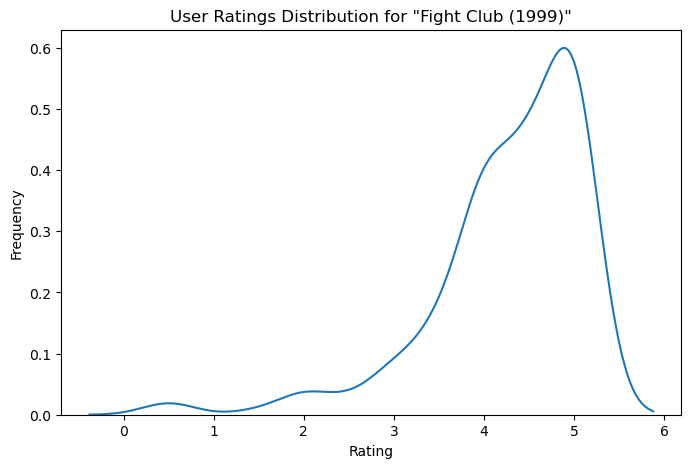

In [64]:
plt.figure(figsize=(8, 5))
sns.kdeplot(ratings_fight_club)
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [65]:
# Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

#Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [66]:
df2["rating"].count()

233213

In [67]:
df2["rating"].mean()

3.9665348844189645

In [16]:
rating_len=df2["title"].value_counts()

In [79]:
rating_len

Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
                                                                  ...  
Going Places (Valseuses, Les) (1974)                                  1
Zelary (2003)                                                         1
Two Family House (2000)                                               1
Flying Down to Rio (1933)                                             1
Personal Velocity (2002)                                              1
Name: title, Length: 1554, dtype: int64

In [17]:
filtered_movies = rating_len[rating_len > 50].index

In [81]:
filtered_movies

Index(['Pulp Fiction (1994)', 'Fight Club (1999)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
       '2001: A Space Odyssey (1968)',
       'Eternal Sunshine of the Spotless Mind (2004)', 'Inception (2010)',
       'Big Lebowski, The (1998)', 'Donnie Darko (2001)',
       'Forrest Gump (1994)',
       ...
       'Arachnophobia (1990)', 'Roman Holiday (1953)', 'Caddyshack (1980)',
       'Magnolia (1999)', 'Million Dollar Baby (2004)', 'Donnie Brasco (1997)',
       'The Devil's Advocate (1997)', 'Dallas Buyers Club (2013)',
       'Lara Croft Tomb Raider: The Cradle of Life (2003)', 'Splash (1984)'],
      dtype='object', length=480)

In [18]:
def filtered_movies(ratings_df, movies_df):
    # Step 1: Group user ratings based on movieId and apply aggregation operations
    grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
    grouped_ratings.columns = ['movieId', 'rating_len', 'rating_mean']

    # Step 2: Inner join on movieId
    merged_df = pd.merge(movies_df,grouped_ratings, on='movieId', how='inner')

    # Step 3: Filter movies with more than 50 user ratings
    filtered_movies = merged_df[merged_df['rating_len'] > 50]

    return filtered_movies

In [19]:
ratings_df = pd.DataFrame(data2)
movies_df = pd.DataFrame(data)

In [20]:
filtered_movies_df = filtered_movies(ratings_df, movies_df)


In [21]:
filtered_movies_df

,movieId,title,genres,rating_len,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [22]:
most_popular_movie = filtered_movies_df.loc[filtered_movies_df['rating_mean'].idxmax()]

In [23]:
most_popular_movie

movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
rating_len                                  317
rating_mean                            4.429022
Name: 277, dtype: object

In [24]:
popular_movies = filtered_movies_df.nlargest(5, 'rating_len')

In [25]:
popular_movies

,movieId,title,genres,rating_len,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [26]:
sci_fi_movies = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

In [27]:
sci_fi_3 = sci_fi_movies.nlargest(3, 'rating_len')


In [28]:
sci_fi_3

,movieId,title,genres,rating_len,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [29]:
data4=pd.read_csv(r"C:\Users\user\Downloads\movie_data\links.csv")

In [30]:
data4.shape

(9742, 3)

In [123]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.FILL_IN_THE_BLANK(URL, headers=request_header)
    soup = FILL_IN_THE_BLANK(response.text)
    imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
    return imdb_rating.text if imdb_rating else np.nan

In [124]:
data4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [35]:
df3=pd.merge(filtered_movies_df,data4,on="movieId")

In [36]:
df3

,movieId,title,genres,rating_len,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [39]:
movie_with_highest_imdb_rating = df3.loc[df3['imdbId'].idxmax()]

In [40]:
movie_with_highest_imdb_rating


movieId                                  109374
title          Grand Budapest Hotel, The (2014)
genres                             Comedy|Drama
rating_len                                   52
rating_mean                            3.778846
imdbId                                  2278388
tmdbId                                 120467.0
Name: 432, dtype: object

In [42]:
sci_fi_movies = df3[df3['genres'].str.contains('Sci-Fi')]

sci_fi_movie_id = sci_fi_movies['movieId']

In [44]:
sci_fi_movie_id.max()

122904

In [45]:
sci_fi_movies = df3[df3['genres'].str.contains('Sci-Fi')]
sci_fi_movie_id = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax(), 'movieId']

In [46]:
sci_fi_movie_id 

112852

In [49]:


def scrape_imdb_ratings(imdb_id):
    URL = f"https://www.imdb.com/title/{imdb_id}/"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(URL, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating_tag = soup.find('span', {'itemprop': 'ratingValue'})

        return imdb_rating_tag.text if imdb_rating_tag else None
    else:
        return None

ratings_df = df3 
ratings_df['imdb_rating'] = ratings_df['imdbId'].apply(scrape_imdb_ratings)

print(ratings_df)


     movieId                             title  \
0          1                  Toy Story (1995)   
1          2                    Jumanji (1995)   
2          3           Grumpier Old Men (1995)   
3          6                       Heat (1995)   
4          7                    Sabrina (1995)   
..       ...                               ...   
431   106782   Wolf of Wall Street, The (2013)   
432   109374  Grand Budapest Hotel, The (2014)   
433   109487               Interstellar (2014)   
434   112852    Guardians of the Galaxy (2014)   
435   122904                   Deadpool (2016)   

                                          genres  rating_len  rating_mean  \
0    Adventure|Animation|Children|Comedy|Fantasy         215     3.920930   
1                     Adventure|Children|Fantasy         110     3.431818   
2                                 Comedy|Romance          52     3.259615   
3                          Action|Crime|Thriller         102     3.946078   
4             